# 1단계. 데이터 전처리

### 데이터 불러오기

In [1]:
import pandas as pd
from pytimekr import pytimekr
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_set=pd.read_excel('preprocessed_두리발_2020년1월_2022년7월_콜상세내역.xlsx')

In [3]:
data_set

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


In [4]:
data=data_set.copy()

In [5]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


- 승차대기시간 이상값 확인

In [6]:
# 승차대기시간(분)에서 1보다 작은 값을 제외하고 필터링
filtered_df = data[data['승차대기시간(분)'] < 1]

# 결과 출력
filtered_df

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
237,2020-01-01 15:48:48.033,1,부산광역시 동구,부산광역시 동래구,496933,282839,498875,289257,2020-01-01 15:49:59.160,2020-01-01 15:50:38,2020-01-01 16:17:49,3200,1.185450,0.647333,1.832783,27.183333,12982.446896,False,True
322,2020-01-01 19:28:19.207,1,부산광역시 해운대구,부산광역시 동구,502028,288303,496944,282392,2020-01-01 19:31:16.880,2020-01-01 19:31:58,2020-01-01 19:52:52,3700,2.961217,0.685333,3.646550,20.900000,15311.755033,False,True
524,2020-01-02 09:05:15.733,1,부산광역시 영도구,부산광역시 중구,497354,275587,494559,278144,2020-01-02 09:05:26.843,2020-01-02 09:05:30,2020-01-02 09:05:31,0,0.185167,0.052617,0.237783,0.016667,9068.341981,False,False
678,2020-01-02 11:08:16.337,1,부산광역시 사상구,부산광역시 사하구,489716,282830,488745,273069,2020-01-02 11:08:16.630,2020-01-02 11:08:29,2020-01-02 11:28:57,3700,0.004883,0.206167,0.211050,20.466667,10561.619952,False,False
775,2020-01-02 12:00:22.160,1,부산광역시 서구,경상남도 김해시,492822,280552,481169,292511,2020-01-02 12:00:22.470,2020-01-02 12:00:31,2020-01-02 12:34:49,5600,0.005167,0.142167,0.147333,34.300000,12823.201740,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654388,2022-07-30 15:55:25.923,7,부산광역시 해운대구,부산광역시 영도구,501859,288721,498389,276871,2022-07-30 15:57:09.923,2022-07-30 15:57:48,2022-07-30 16:33:05,5200,1.733333,0.634617,2.367950,35.283333,13656.220696,True,False
654493,2022-07-30 21:32:19.470,7,부산광역시 동래구,부산광역시 동래구,498703,290283,500243,290125,2022-07-30 21:35:04.047,2022-07-30 21:35:27,2022-07-30 21:47:01,1800,2.742950,0.382550,3.125500,11.566667,12654.153967,True,False
654635,2022-07-31 10:53:58.983,7,부산광역시 해운대구,부산광역시 기장군,502411,291191,513006,301986,2022-07-31 10:53:59.373,2022-07-31 10:54:42,2022-07-31 11:31:34,5500,0.006500,0.710450,0.716950,36.866667,8324.696737,True,False
654752,2022-07-31 13:52:23.087,7,부산광역시 북구,부산광역시 북구,491849,290579,492610,290392,2022-07-31 13:59:03.850,2022-07-31 13:59:24,2022-07-31 14:07:20,1800,6.679383,0.335833,7.015217,7.933333,17365.611103,True,False


In [7]:
# 승차대기시간(분)에서 1보다 작은 값을 제외하고 필터링
data = data[data['승차대기시간(분)'] >= 1]

# 결과 출력
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


- 접수시간 생성

In [8]:
data['접수시간']=data['접수일시'].dt.hour

/tmp/ipykernel_2838684/1763112670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['접수시간']=data['접수일시'].dt.hour


In [9]:
data['접수시간']

0          0
1          0
2          0
3          0
4          0
          ..
654869    21
654870    21
654871    21
654872    21
654873    23
Name: 접수시간, Length: 651337, dtype: int32

- 요일 생성하기

In [10]:
data['요일']='월'
data.loc[data['승차일시'].dt.weekday==1,'요일']='화'
data.loc[data['승차일시'].dt.weekday==2,'요일']='수'
data.loc[data['승차일시'].dt.weekday==3,'요일']='목'
data.loc[data['승차일시'].dt.weekday==4,'요일']='금'
data.loc[data['승차일시'].dt.weekday==5,'요일']='토'
data.loc[data['승차일시'].dt.weekday==6,'요일']='일'

/tmp/ipykernel_2838684/861225814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['요일']='월'


In [11]:
data['요일']=data['승차일시'].dt.weekday

/tmp/ipykernel_2838684/4118538062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['요일']=data['승차일시'].dt.weekday


In [12]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,...,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True,0,2
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,...,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True,0,2
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,...,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True,0,2
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,...,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True,0,2
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,...,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [13]:
time0=data['승차일시'][0]-data['승차일시'][0]
data=data.drop(data[(data['배차일시']-data['접수일시'])<=time0].index,axis=0)
data=data.drop(data[(data['승차일시']-data['배차일시'])<=time0].index,axis=0)
data=data.drop(data[(data['하차일시']-data['승차일시'])<=time0].index,axis=0)
data=data.drop(data[data['총대기시간(분)']>=6*60].index,axis=0)

In [14]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,...,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True,0,2
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,...,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True,0,2
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,...,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True,0,2
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,...,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True,0,2
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,...,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


### 이상치 제거

In [15]:
import pandas as pd

# IQR 계산
Q1 = data['총대기시간(분)'].quantile(0.25)
Q3 = data['총대기시간(분)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
filtered_data = data[(data['총대기시간(분)'] >= lower_bound) & (data['총대기시간(분)'] <= upper_bound)]

# 결과 출력
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")
filtered_data

Original data size: (651327, 21)
Filtered data size: (638315, 21)


,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
12,2020-01-01 05:06:44.297,1,부산광역시 사상구,부산광역시 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,1900,11.036767,30.308283,41.345050,17.383333,3210.950152,False,True,5,2
13,2020-01-01 05:29:11.703,1,부산광역시 해운대구,경상남도 양산시,506696,285824,490101,301659,2020-01-01 05:29:51.013,2020-01-01 06:05:49,...,9300,0.655167,35.966450,36.621617,54.333333,3724.877799,False,True,5,2
15,2020-01-01 05:32:39.097,1,부산광역시 연제구,부산광역시 부산진구,498495,288086,495760,284851,2020-01-01 05:34:44.470,2020-01-01 05:51:35,...,2100,2.089550,16.842167,18.931717,10.366667,359.389316,False,True,5,2
18,2020-01-01 05:57:06.427,1,부산광역시 연제구,부산광역시 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,5500,61.793600,20.999283,82.792883,35.283333,5120.670073,False,True,5,2
19,2020-01-01 06:21:30.313,1,부산광역시 부산진구,부산광역시 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,5500,35.235833,16.442283,51.678117,35.316667,16660.328522,False,True,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [16]:
data = filtered_data

- 거리에 따른 탑승시간 맞지 않는 이상치 제거

In [17]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일'],
      dtype='object')

In [18]:
data['거리']=((data['호출지경도']-data['목적지경도'])**2+(data['호출지위도']-data['목적지위도'])**2)**0.5

/tmp/ipykernel_2838684/2313901543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['거리']=((data['호출지경도']-data['목적지경도'])**2+(data['호출지위도']-data['목적지위도'])**2)**0.5


(0.0, 15000.0)

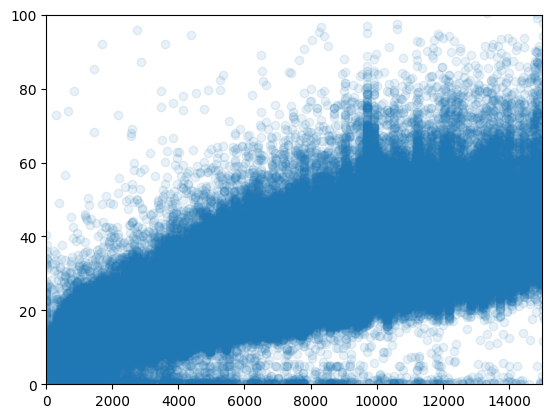

In [19]:
import matplotlib.pyplot as plt

plt.scatter(data['거리'],data['승차시간(분)'],alpha=0.1)
plt.ylim(0,100)
plt.xlim(0,15000)

- 목직지역과 출발지역 모두 부산인 곳만 추출

In [20]:
data['목적지역'].unique()

array(['부산광역시 사상구', '경상남도 양산시', '부산광역시 부산진구', '부산광역시 사하구', '부산광역시 금정구',
       '부산광역시 북구', '부산광역시 기장군', '부산광역시 동래구', '부산광역시 연제구', '부산광역시 중구',
       '부산광역시 동구', '부산광역시 서구', '부산광역시 강서구', '부산광역시 남구', '경상남도 김해시',
       '부산광역시 영도구', '부산광역시 해운대구', '부산 동래구', '부산 기장군', '부산광역시 수영구',
       '부산 사상구', '부산 남구', '부산 북구', '부산 사하구', '부산 부산진구', '부산 연제구',
       '부산 해운대구', '경남 양산시', '경상남도 창원시', '부산 영도구', '부산 수영구', '경남 김해시',
       '부산 강서구', '부산 서구', '부산 중구', '부산 동구', '부산 금정구', '부산광역시', '경상남도 창녕군',
       '경상남도 거제시', '경상북도 청도군', '경상남도 밀양시', '경상북도 경주시', '경상남도 산청군',
       '울산광역시 남구', '경상남도 통영시', '경상남도 함양군', '울산광역시 중구', '경상남도 남해군',
       '강원도 속초시', '경상남도 하동군', '충청북도 청주시', '경기도 남양주시', '전라남도 목포시'],
      dtype=object)

In [21]:
import pandas as pd

# '부산광역시'를 '부산'으로 변경
data["출발지역"] = data["출발지역"].str.replace("부산광역시", "부산")
data["목적지역"] = data["목적지역"].str.replace("부산광역시", "부산")

/tmp/ipykernel_2838684/848100771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["출발지역"] = data["출발지역"].str.replace("부산광역시", "부산")
/tmp/ipykernel_2838684/848100771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["목적지역"] = data["목적지역"].str.replace("부산광역시", "부산")


In [22]:
data['목적지역'].unique()

array(['부산 사상구', '경상남도 양산시', '부산 부산진구', '부산 사하구', '부산 금정구', '부산 북구',
       '부산 기장군', '부산 동래구', '부산 연제구', '부산 중구', '부산 동구', '부산 서구', '부산 강서구',
       '부산 남구', '경상남도 김해시', '부산 영도구', '부산 해운대구', '부산 수영구', '경남 양산시',
       '경상남도 창원시', '경남 김해시', '부산', '경상남도 창녕군', '경상남도 거제시', '경상북도 청도군',
       '경상남도 밀양시', '경상북도 경주시', '경상남도 산청군', '울산광역시 남구', '경상남도 통영시',
       '경상남도 함양군', '울산광역시 중구', '경상남도 남해군', '강원도 속초시', '경상남도 하동군',
       '충청북도 청주시', '경기도 남양주시', '전라남도 목포시'], dtype=object)

In [23]:
data['출발지역'].unique()

array(['부산 사상구', '부산 해운대구', '부산 연제구', '부산 부산진구', '부산 북구', '부산 동래구',
       '부산 수영구', '부산 기장군', '부산 사하구', '부산 금정구', '부산 남구', '부산 서구', '부산 영도구',
       '부산 중구', '부산 강서구', '부산 동구', '경남 양산시', '경상남도 양산시', '부산', '경상남도 김해시',
       '경상남도 창원시', '충청북도 청주시'], dtype=object)

In [24]:
# 출발지역과 목적지역이 모두 '부산'인 데이터만 필터링
filtered_df = data[(data["출발지역"].str.startswith("부산")) & (data["목적지역"].str.startswith("부산"))]

# 결과 출력
filtered_df

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일,거리
12,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,11.036767,30.308283,41.345050,17.383333,3210.950152,False,True,5,2,2849.793852
15,2020-01-01 05:32:39.097,1,부산 연제구,부산 부산진구,498495,288086,495760,284851,2020-01-01 05:34:44.470,2020-01-01 05:51:35,...,2.089550,16.842167,18.931717,10.366667,359.389316,False,True,5,2,4236.207030
18,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,61.793600,20.999283,82.792883,35.283333,5120.670073,False,True,5,2,13430.378438
19,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,35.235833,16.442283,51.678117,35.316667,16660.328522,False,True,6,2,13395.157371
20,2020-01-01 06:33:43.930,1,부산 북구,부산 부산진구,494108,290599,498091,287066,2020-01-01 06:53:16.720,2020-01-01 07:07:33,...,19.546500,14.271333,33.817833,16.150000,7362.768264,False,True,6,2,5324.131666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6,6669.457624
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6,5792.689617
654871,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6,19692.733787
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6,934.400342


In [25]:
filtered_df['목적지역'].unique()

array(['부산 사상구', '부산 부산진구', '부산 사하구', '부산 금정구', '부산 북구', '부산 기장군',
       '부산 동래구', '부산 연제구', '부산 중구', '부산 동구', '부산 서구', '부산 강서구', '부산 남구',
       '부산 영도구', '부산 해운대구', '부산 수영구', '부산'], dtype=object)

In [26]:
filtered_df['출발지역'].unique()

array(['부산 사상구', '부산 연제구', '부산 부산진구', '부산 북구', '부산 해운대구', '부산 동래구',
       '부산 수영구', '부산 기장군', '부산 사하구', '부산 금정구', '부산 남구', '부산 서구', '부산 영도구',
       '부산 중구', '부산 강서구', '부산 동구', '부산'], dtype=object)

In [27]:
data = filtered_df

### 불필요한 열 제거

In [29]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일', '거리'],
      dtype='object')

In [31]:
data=data.drop(['배차일시', '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '승차시간(분)', '직선거리(km)'],axis=1)

In [32]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,거리
12,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,41.345050,False,True,5,2,2849.793852
15,2020-01-01 05:32:39.097,1,부산 연제구,부산 부산진구,498495,288086,495760,284851,18.931717,False,True,5,2,4236.207030
18,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,82.792883,False,True,5,2,13430.378438
19,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,51.678117,False,True,6,2,13395.157371
20,2020-01-01 06:33:43.930,1,부산 북구,부산 부산진구,494108,290599,498091,287066,33.817833,False,True,6,2,5324.131666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,41.235333,True,False,21,6,6669.457624
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,49.372783,True,False,21,6,5792.689617
654871,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,48.949617,True,False,21,6,19692.733787
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,84.516000,True,False,21,6,934.400342


In [33]:
data.to_excel('Basic_preprocessed_두리발_2020년1월_2022년7월_콜상세내역.xlsx', index=False)

In [34]:
import pandas as pd

data = pd.read_excel('Basic_preprocessed_두리발_2020년1월_2022년7월_콜상세내역.xlsx')
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,거리
0,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,41.345050,False,True,5,2,2849.793852
1,2020-01-01 05:32:39.097,1,부산 연제구,부산 부산진구,498495,288086,495760,284851,18.931717,False,True,5,2,4236.207030
2,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,82.792883,False,True,5,2,13430.378438
3,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,51.678117,False,True,6,2,13395.157371
4,2020-01-01 06:33:43.930,1,부산 북구,부산 부산진구,494108,290599,498091,287066,33.817833,False,True,6,2,5324.131666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610320,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,41.235333,True,False,21,6,6669.457624
610321,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,49.372783,True,False,21,6,5792.689617
610322,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,48.949617,True,False,21,6,19692.733787
610323,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,84.516000,True,False,21,6,934.400342
